In [1]:
import numpy as np
from scipy.stats import bernoulli
from random import seed
from random import random

In [19]:
def initialize(k):
    beta_distn_reward = []
    for i in range(k):
        beta_distn_reward.append([0.0,0.0])

    return beta_distn_reward

def sample_reward(arm_pulled, mu):
    reward_received = bernoulli.rvs(mu[arm_pulled], size=1)[0]
    return reward_received

def update_distn(arm_pulled, beta_distn_reward, reward_received):
    beta_distn_reward[arm_pulled][0] += reward_received
    beta_distn_reward[arm_pulled][1] += (1-reward_received)
    return beta_distn_reward

def choose_arm(beta_distn_reward, k, mu):

    sampled_mean_reward = np.array([0]*k, dtype=np.float)

    for arm in range(k):
        sampled_mean_reward[arm] = np.random.beta(beta_distn_reward[arm][0]+1, beta_distn_reward[arm][1]+1)
    arm_pulled = np.argmax(sampled_mean_reward)
    reward_received = sample_reward(arm_pulled, mu)
    beta_distn_reward = update_distn(arm_pulled, beta_distn_reward, reward_received)

    return reward_received, arm_pulled, beta_distn_reward

def compute_best_arm(mu):
    return np.argmax(mu)

In [20]:
def fairness_without_budget_thompson_sampling(mu, T, k, alpha = None, r = None):
    reward_records = []
    arm_pulled_records = []
    arm_pulled_count = np.array([0]*k)

    beta_distn_reward = initialize(k)

    for t in range(T):
        unfair_arm = []
        unfair_val = []
        if(alpha is not None and r is not None):
            for i in range(k):
                if (r[i]*(t-1) - arm_pulled_count[i]) > alpha:
                    unfair_arm.append(i)
                    unfair_val.append(r[i]*(t-1) - arm_pulled_count[i])
        if unfair_arm:
            arm_pulled = unfair_arm[np.argmax(np.array(unfair_val))]
            reward_received = sample_reward(arm_pulled, mu)
            # print(cost_received)
            beta_distn_reward = update_distn(arm_pulled, beta_distn_reward, reward_received)
        else:
            reward_received, arm_pulled, beta_distn_reward = choose_arm(beta_distn_reward, k, mu)
        
        arm_pulled_count[arm_pulled] += 1
        reward_records.append(reward_received)
        arm_pulled_records.append(arm_pulled)


    return arm_pulled_count, reward_records, arm_pulled_records

In [23]:
def compute_regret(t,r,mu,reward_records):
  reward_received = np.sum(reward_records)
  reward_optimal_fair = np.sum(t*r*mu)+(1-np.sum(r))*t*np.max(np.array(mu))
  return reward_optimal_fair - reward_received

In [35]:
k = 10                          #Number of arms
mu = np.zeros(k)                #mean_rewards
# seed(1)
for i in range(k):
  mu[i] = random()

for i in range(k):
  mu[i] = (0.8-0.01*i)

T = count = 50000              #budget
# r = np.zeros(k)
r = np.array([0.05]*k)          #fairness_array for different arms
alpha = 0                       #tolerance_parameter for fairness

###### FOR BUDGET AND FAIRNESS BOTH ########
arm_pulled_count, reward_records, arm_pulled_records = fairness_without_budget_thompson_sampling(mu, count, k, alpha, r)
regret_record = compute_regret(count, r, mu, reward_records)
print (arm_pulled_count)

###### FOR BUDGET ONLY ########

print (regret_record)
# print (len(regret_record))

[22126  7874  2500  2500  2500  2500  2500  2500  2500  2500]
34.0


502.45341784462556


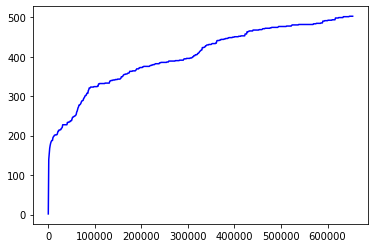